In [9]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision.transforms.functional as TF
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    FoVPerspectiveCameras,
    MeshRasterizer,
    MeshRenderer,
    RasterizationSettings,
    look_at_view_transform,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Load mesh and cameras

device = torch.device("cuda:0")
meshes: Meshes = load_objs_as_meshes(["data/max-planck.obj"], device=device)

dist = 2
azim = 150
elev = 0
R, T = look_at_view_transform(dist=dist, azim=azim, elev=elev)

cameras = FoVPerspectiveCameras(device=device, R=R, T=T, fov=60)

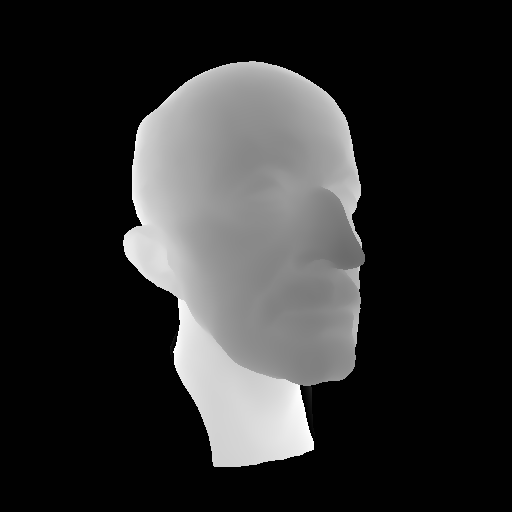

In [18]:
# %% setup renderer and camera
from pytorch3d.renderer import SoftSilhouetteShader

# raster settings
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)

rasterizer = MeshRasterizer(cameras=cameras, raster_settings=raster_settings)
shader = SoftSilhouetteShader()

renderer = MeshRenderer(rasterizer=rasterizer, shader=shader)

renders = renderer(meshes, cameras=cameras)
fragments = rasterizer(meshes)

render = renders.cpu()
depth = fragments.zbuf.cpu()

TF.to_pil_image(depth[0, :, :, 0])